In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm

if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
global temp_list
temp_list = []
Agent_number_n=4;
Alpha = (1-0.700);

# torch.manual_seed(1)    # reproducible
# np.random.seed(1)



In [3]:
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(50000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(50000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.69810282 0.33585658 0.09898744]
  [0.74278968 0.33585658 0.09898744]
  [0.74278968 0.69810282 0.09898744]
  [0.74278968 0.69810282 0.33585658]]

 [[0.56895179 0.4213326  0.04096365]
  [0.90271179 0.4213326  0.04096365]
  [0.90271179 0.56895179 0.04096365]
  [0.90271179 0.56895179 0.4213326 ]]

 [[0.59794763 0.52584147 0.29182933]
  [0.7859279  0.52584147 0.29182933]
  [0.7859279  0.59794763 0.29182933]
  [0.7859279  0.59794763 0.52584147]]

 ...

 [[0.50426797 0.49116051 0.26282227]
  [0.73957552 0.49116051 0.26282227]
  [0.73957552 0.50426797 0.26282227]
  [0.73957552 0.50426797 0.49116051]]

 [[0.77195476 0.67935178 0.0637522 ]
  [0.96032966 0.67935178 0.0637522 ]
  [0.96032966 0.77195476 0.0637522 ]
  [0.96032966 0.77195476 0.67935178]]

 [[0.90105104 0.63215727 0.50354272]
  [0.99321363 0.63215727 0.50354272]
  [0.99321363 0.90105104 0.50354272]
  [0.99321363 0.90105104 0.63215727]]]
[[[0.50250525 0.50009775 0.32310263]
  [0.73463728 0.50009775 0.32310263]
  [0.73463728 0.5025

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

3.3734935889632798 2.999999999999999 0.37349358896328066


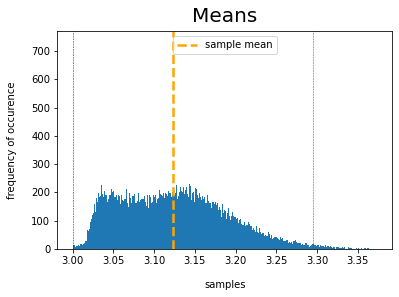

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight, gain=torch.nn.init.calculate_gain('relu'))
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_normal_(m.weight, gain=torch.nn.init.calculate_gain('relu'))
        torch.nn.init.uniform_(m.bias, a=-1.0, b=1.0)

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        
        self.input_dim = Agent_number_n-1
        self.hidden_dim = 20
        self.output_dim = 1
        self.hidden_layer_count = 3 
        
        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.output_dim))

    def calculate(self, value_list):
        h = value_list
        for layer in self.layers:
            h = torch.relu(layer(h))
        return h

    def forward(self, input_list,input_label):
        global iteration,echo
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).cuda().type(torch.float32)
        h_list = []
        for i in range(Agent_number_n):
            h = self.calculate(input_list[i])
            h_list.append(h)
        
        input_label = torch.from_numpy(
            np.array(input_label)).cuda().type(torch.float32)
        sum_h = torch.sum(torch.cat(h_list)).cuda()
        
        
        loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                        torch.square((Agent_number_n-1)*input_label-sum_h),
                        torch.zeros(1).cuda()
                      )

        loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                        torch.square(sum_h-(Agent_number_n-Alpha)*input_label),
                        torch.zeros(1).cuda()
                      )
                      

        return loss1,loss2,h_list

In [7]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

#net = torch.load("save/Deep_learning_small_4")
net.to(dev)

Net(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [8]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00001)
optimizer = opt.Adam(net.parameters(), lr=0.00005)

batch_size = 128
echo = 10

In [9]:
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        loss2_list = []
        loss1_sum = 0
        loss2_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss1,h_loss2,h_list = net(training_data[index],training_label[index])
            denominator += 1
            loss1_sum += h_loss1
            loss2_sum += h_loss2
            
        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.02):
            print(temp_number,loss,float(loss1_sum),float(loss2_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()

6096 tensor([31.9172], device='cuda:0', grad_fn=<DivBackward0>) 4085.40087890625 0.0
6858 tensor([30.7265], device='cuda:0', grad_fn=<DivBackward0>) 3932.99560546875 0.0
8763 tensor([29.0014], device='cuda:0', grad_fn=<DivBackward0>) 3712.184326171875 0.0
10414 tensor([27.5604], device='cuda:0', grad_fn=<DivBackward0>) 3527.73095703125 0.0
11811 tensor([23.5181], device='cuda:0', grad_fn=<DivBackward0>) 3010.3134765625 0.0
17907 tensor([17.2731], device='cuda:0', grad_fn=<DivBackward0>) 2210.957275390625 0.0
23114 tensor([11.1913], device='cuda:0', grad_fn=<DivBackward0>) 1432.4893798828125 0.0
26416 tensor([10.1730], device='cuda:0', grad_fn=<DivBackward0>) 1301.9110107421875 0.23267345130443573
29337 tensor([8.8140], device='cuda:0', grad_fn=<DivBackward0>) 1127.4072265625 0.7886591553688049
32512 tensor([8.1121], device='cuda:0', grad_fn=<DivBackward0>) 1033.9395751953125 4.413887977600098
33401 tensor([4.3235], device='cuda:0', grad_fn=<DivBackward0>) 548.7547607421875 4.6503643989

21717 tensor([0.0013], device='cuda:0', grad_fn=<DivBackward0>) 0.020922040566802025 0.15169480443000793
36576 tensor([0.0021], device='cuda:0', grad_fn=<DivBackward0>) 0.11737082898616791 0.14635561406612396
37211 tensor([0.0043], device='cuda:0', grad_fn=<DivBackward0>) 0.16413554549217224 0.3902175724506378
41656 tensor([0.0028], device='cuda:0', grad_fn=<DivBackward0>) 0.03029174543917179 0.32245203852653503
batch iteration 9
batch_loss: 0.01 



In [10]:
torch.save(net, "save/Deep_learning_small_4")

In [11]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    



In [12]:
print(torch.tensor(testing_data[2][i]).cuda().type(torch.float32))

tensor([0.9406, 0.9173, 0.5758], device='cuda:0')


In [13]:
h = net.calculate(torch.tensor(testing_data[2][i]).cuda().type(torch.float32))
print(h)

tensor([2.5815], device='cuda:0', grad_fn=<ReluBackward0>)


In [14]:
print(max(result_list),min(result_list),max(result_list)-min(result_list))

4.263631024237064 2.030844271183014 2.23278675305405


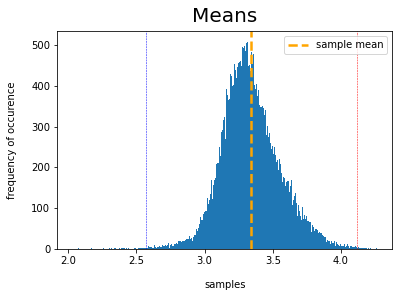

In [15]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="0.1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()